In [10]:
!wget https://files.consumerfinance.gov/ccdb/complaints.csv.zip

--2023-09-24 12:16:56--  https://files.consumerfinance.gov/ccdb/complaints.csv.zip
Resolving files.consumerfinance.gov (files.consumerfinance.gov)... 13.227.74.3, 13.227.74.68, 13.227.74.63, ...
Connecting to files.consumerfinance.gov (files.consumerfinance.gov)|13.227.74.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 654930738 (625M) [binary/octet-stream]
Saving to: ‘complaints.csv.zip’

complaints.csv.zip  100%[===================>] 624.59M  28.8MB/s    in 23s     

2023-09-24 12:17:20 (27.0 MB/s) - ‘complaints.csv.zip’ saved [654930738/654930738]



In [11]:
!unzip complaints.csv.zip

Archive:  complaints.csv.zip
  inflating: complaints.csv          


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [33]:
df = pd.read_csv('/content/complaints.csv')

<ipython-input-33-8133183531b8>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/complaints.csv')


In [34]:
df.dropna()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
119973,2017-01-20,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,"Received a phone call from XXXX, WA ( XXXX ), ...",Company believes complaint is the result of an...,"GMA Investments, LLC",WA,98108,Servicemember,Consent provided,Web,2017-03-24,Closed with explanation,Yes,No,2298566
120186,2017-03-29,Debt collection,Mortgage,Cont'd attempts collect debt not owed,Debt was paid,"In XX/XX/XXXX, USAA FEDERAL SAVINGS BANK accep...",Company believes complaint is the result of an...,UNITED SERVICES AUTOMOBILE ASSOCIATION,FL,32174,"Older American, Servicemember",Consent provided,Web,2017-03-30,Closed with non-monetary relief,Yes,No,2409999
120234,2017-04-07,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt resulted from identity theft,In XX/XX/XXXX I received a collection notice f...,Company believes it acted appropriately as aut...,ERC,CA,91360,Servicemember,Consent provided,Web,2017-04-07,Closed,Yes,No,2425727
120403,2017-03-29,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,Hunter Warfield has continued to contact me re...,Company believes the complaint is the result o...,"HW Holding, Inc",NM,87109,Servicemember,Consent provided,Web,2017-03-29,Closed with non-monetary relief,Yes,No,2408846
122326,2017-04-05,Debt collection,Credit card,Disclosure verification of debt,Right to dispute notice not received,After reviewing my credit report with all XXXX...,Company believes it acted appropriately as aut...,UNITED SERVICES AUTOMOBILE ASSOCIATION,CA,95628,Servicemember,Consent provided,Web,2017-04-05,Closed with explanation,Yes,Yes,2422117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087328,2016-05-01,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,There is so much malfeasance with XXXX nationa...,Company believes it acted appropriately as aut...,"Capital Management Services, LP",MD,20910,Older American,Consent provided,Web,2016-05-01,Closed with explanation,Yes,No,1904218
4087842,2015-04-07,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt was paid,This is Part XXXX of case number XXXX.SunTrust...,Company chooses not to provide a public response,"SUNTRUST BANKS, INC.",NC,XXXXX,Older American,Consent provided,Web,2015-04-07,Closed with explanation,Yes,Yes,1320372
4088578,2015-05-14,Debt collection,"Other (i.e. phone, health club, etc.)",Communication tactics,Frequent or repeated calls,constant robo calling,Company disputes the facts presented in the co...,"Financial Recovery Services, Inc.",FL,335XX,Older American,Consent provided,Web,2015-05-14,Closed with explanation,Yes,No,1375699
4090287,2015-07-14,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,Almost daily phone calls from Stellar Recovery...,Company can't verify or dispute the facts in t...,"Stellar Recovery, Inc.",MI,48080,Older American,Consent provided,Web,2015-07-14,Closed with explanation,Yes,Yes,1467052


In [35]:
df=complaints_df.sample(frac=0.5)
df.head()

NameError: ignored

In [ ]:
df.head()

In [ ]:
# Step 2: Text Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [ ]:
# Download NLTK stopwords (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt')

In [ ]:
# Preprocess the text data
X = df['Consumer complaint narrative'].fillna('')  # Assuming text data is in 'Consumer complaint narrative'
y = df['Product']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Text Preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [ ]:
def preprocess(text):
  text="".join(word.lower() for word in text)
  tokens=word_tokenize(text)
  text= [stemmer.stem(word) for word in tokens if word not in stop_words]
  return text

In [ ]:
# Encode target labels using the LabelEncoder
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

# Visualize the distribution of target classes (y_train_encoded)
plt.figure(figsize=(10, 6))
sns.countplot(y_train_encoded, palette='Set3')
plt.title('Distribution of Target Classes (y_train_encoded)')
plt.xlabel('Encoded Product Labels')
plt.ylabel('Count')
plt.show()



In [ ]:
 #Visualize the distribution of text lengths in X_train
text_lengths = [len(text.split()) for text in X_train]
plt.figure(figsize=(10, 6))
sns.histplot(text_lengths, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Text Lengths in X_train')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Visualize the most common words after preprocessing
def plot_most_common_words(corpus, num_words=10):
    flat_list = [word for sublist in corpus for word in sublist]
    word_counts = Counter(flat_list)
    most_common_words = word_counts.most_common(num_words)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words], palette='viridis')
    plt.title(f'Most Common {num_words} Words After Preprocessing')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()





In [ ]:
vectorizer=TfidfVectorizer(analyzer=preprocess)

In [ ]:
vectorizer.fit(X_train)

In [ ]:
X_train=vectorizer.transform(X_train)
X_test=vectorizer.transform(X_test)

In [31]:
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.fit_transform(y_test)

In [28]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.39      0.02      0.04     17336
           1       0.68      0.33      0.44     36623
           2       0.29      0.01      0.01      6363
           3       0.46      0.02      0.03     18373
           4       0.67      0.37      0.48     41473
           5       0.52      0.02      0.03     28017
           6       0.00      0.00      0.00     14473
           7       0.61      0.98      0.75    433405
           8       0.77      0.32      0.45    101727
           9       0.00      0.00      0.00         7
          10       0.72      0.37      0.49     11886
          11       0.00      0.00      0.00      1072
          12       0.86      0.25      0.39     76533
          13       0.00      0.00      0.00       197
          14       0.00      0.00      0.00      1138
          15       0.46      0.15      0.23      6085
          16       0.00      0.00      0.00        64
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


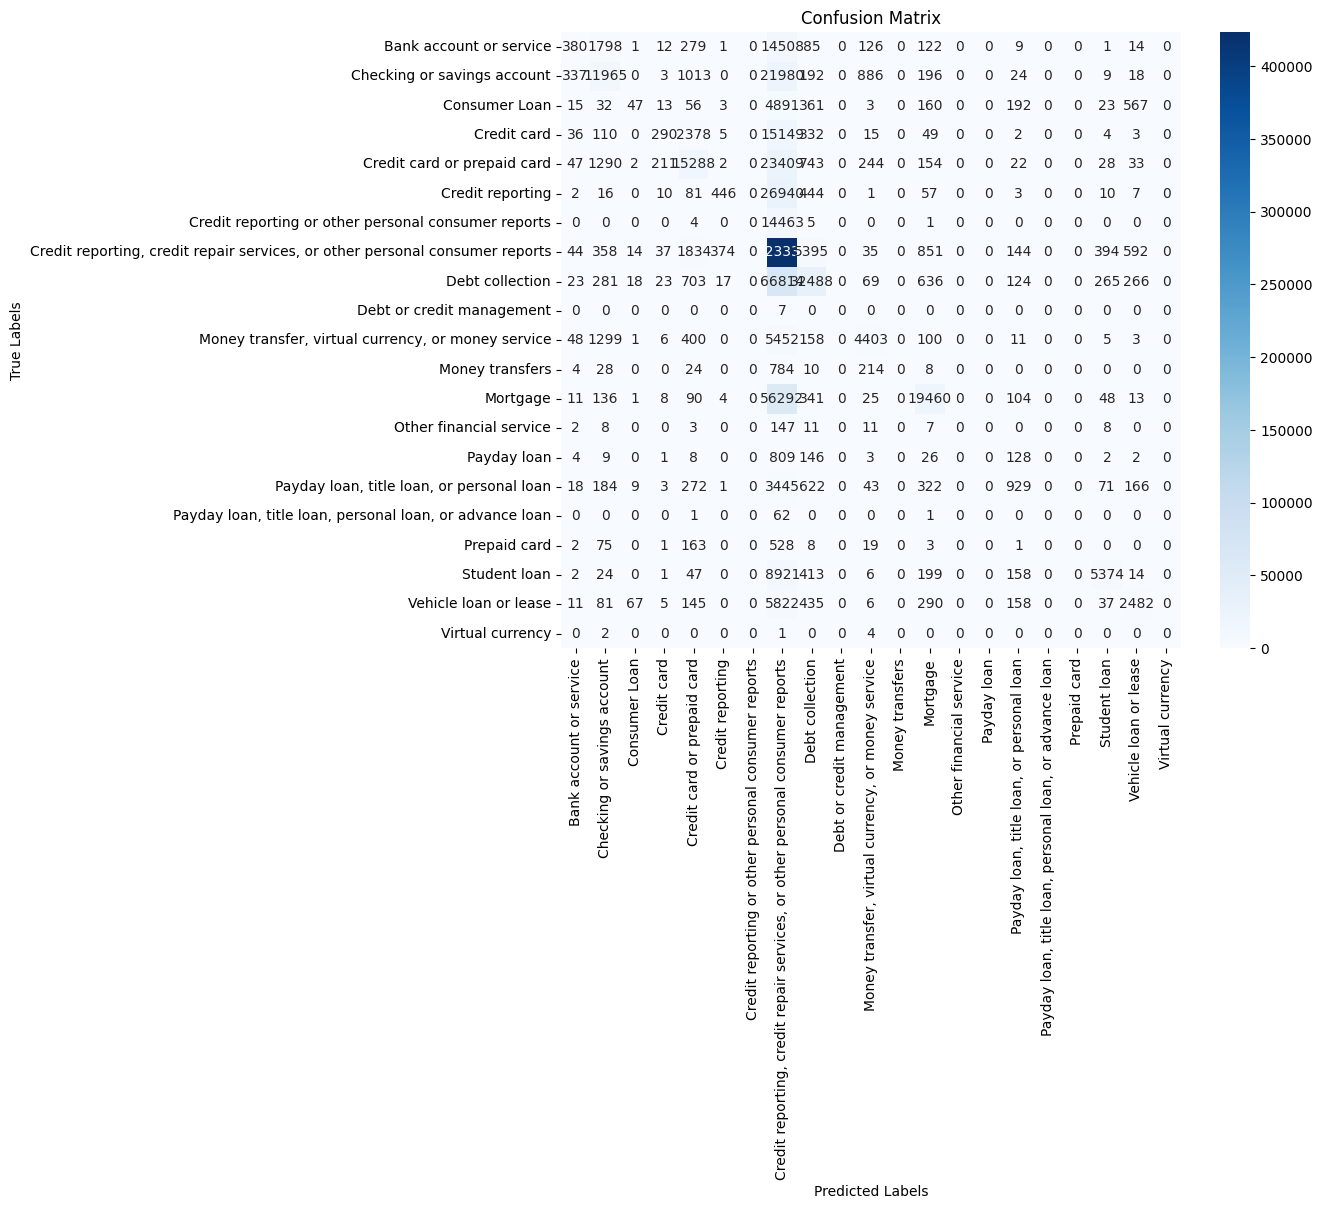

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()